<a href="https://colab.research.google.com/github/Isdra77/VisionArtificial/blob/main/Exploraci%C3%B3n_y_configuraci%C3%B3n_de_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias
Para correr comando *linux*, anteponer el signo **!**

## Otros comandos
Para cierto comandos como *cd* utilizar **%**

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [ ]:
!cd sample_data/

/bin/bash: line 1: cd: sample_data/: No such file or directory


In [ ]:
!pwd

/content/sample_data


In [ ]:
%cd sample_data/

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data


Hola


In [ ]:
!pwd
!ls

/content/sample_data
anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [ ]:
!pip install opencv-python

# Leer una imagen con OpenCV

## Cargar archivos locales en Colab

1.   Subir una imagen al entorno Colab
2.   Obtener su ubicacion
3.   Procesarla



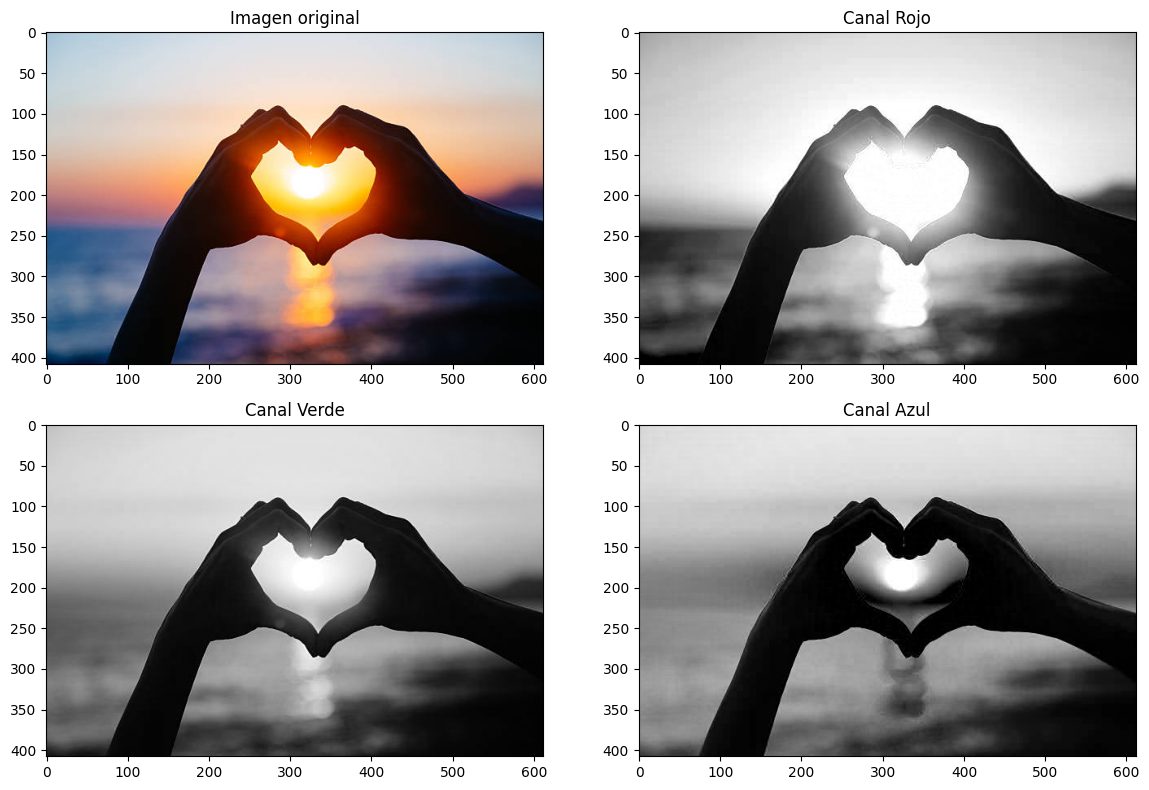

In [ ]:
# prompt: Crea un codigo para leer una imagen con OpenCV y graficar la imagen original junto con sus canales de color RGB con Matplotlib

import cv2
import matplotlib.pyplot as plt

# Cargar la imagen
# The path should be enclosed in quotes
image = cv2.imread('/content/imagen.jpg')  # Reemplaza 'image.jpg' con el nombre de tu archivo


# Convertir la imagen de BGR a RGB (OpenCV lee imágenes en formato BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Obtener los canales de color
red_channel = image_rgb[:, :, 0]
green_channel = image_rgb[:, :, 1]
blue_channel = image_rgb[:, :, 2]

# Mostrar la imagen original y sus canales de color usando Matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagen original')

plt.subplot(2, 2, 2)
plt.imshow(red_channel, cmap='gray')
plt.title('Canal Rojo')

plt.subplot(2, 2, 3)
plt.imshow(green_channel, cmap='gray')
plt.title('Canal Verde')

plt.subplot(2, 2, 4)
plt.imshow(blue_channel, cmap='gray')
plt.title('Canal Azul')

plt.tight_layout()
plt.show()


**Corregir errores con IA**

In [ ]:
# prompt: Detecta el arma en la imagen y colocar un círculo

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar la imagen (asegúrate de que la ruta sea correcta)
image = cv2.imread('/content/zxREAL.jpg')
if image is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta.")
    exit()

# Convertir a espacio de color HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir el rango de color para el arma (ajusta estos valores según sea necesario)
# Ejemplo para detectar tonos metálicos:
lower_color = np.array([0, 0, 100])  # Ajusta estos valores
upper_color = np.array([179, 40, 255])  # Ajusta estos valores


# Crear una máscara para el rango de color
mask = cv2.inRange(hsv, lower_color, upper_color)

# Aplicar operaciones morfológicas para eliminar ruido (opcional, pero recomendado)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Encontrar contornos en la máscara
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Dibujar círculos alrededor de los contornos detectados
image_with_circles = image.copy()
for contour in contours:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    if radius > 10:  # Filtrar círculos pequeños (ruido)
        cv2.circle(image_with_circles, center, radius, (0, 255, 0), 2)


# Mostrar la imagen con los círculos
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image_with_circles, cv2.COLOR_BGR2RGB))
plt.title("Imagen con círculos alrededor de objetos detectados")
plt.axis('off')
plt.show()


Error: No se pudo cargar la imagen. Verifica la ruta.


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
# prompt: Crea un ejemplo con de opercaciones matriciales con numpy

import numpy as np

# Crear dos matrices
matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])

# Suma de matrices
sum_matrix = matrix1 + matrix2
print("Suma de matrices:\n", sum_matrix)

# Resta de matrices
diff_matrix = matrix1 - matrix2
print("Resta de matrices:\n", diff_matrix)

# Multiplicación de matrices
product_matrix = np.dot(matrix1, matrix2)  # o matrix1 @ matrix2
print("Producto de matrices:\n", product_matrix)


# Multiplicación elemento a elemento
elementwise_product = matrix1 * matrix2
print("Producto elemento a elemento:\n", elementwise_product)

# Transpuesta de una matriz
transposed_matrix = matrix1.T
print("Transpuesta de la matriz 1:\n", transposed_matrix)

# Inversa de una matriz
try:
    inverse_matrix = np.linalg.inv(matrix1)
    print("Inversa de la matriz 1:\n", inverse_matrix)
except np.linalg.LinAlgError:
    print("La matriz 1 no es invertible")

# Determinante de una matriz
determinant = np.linalg.det(matrix1)
print("Determinante de la matriz 1:", determinant)


Suma de matrices:
 [[ 6  8]
 [10 12]]
Resta de matrices:
 [[-4 -4]
 [-4 -4]]
Producto de matrices:
 [[19 22]
 [43 50]]
Producto elemento a elemento:
 [[ 5 12]
 [21 32]]
Transpuesta de la matriz 1:
 [[1 3]
 [2 4]]
Inversa de la matriz 1:
 [[-2.   1. ]
 [ 1.5 -0.5]]
Determinante de la matriz 1: -2.0000000000000004


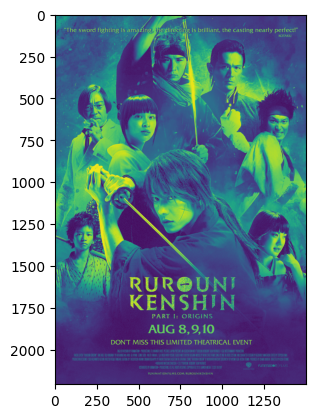

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an color image in grayscale
img = cv2.imread('/content/zxREAL.jpg',0)
plt.imshow(img)
plt.show()

*Mejor resultado*

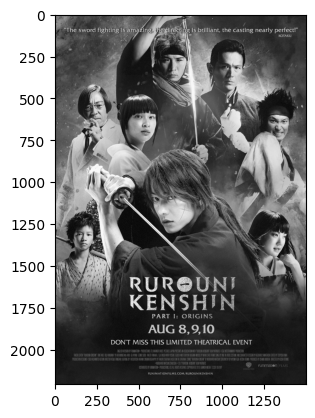

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an color image in grayscale
img = cv2.imread('/content/zxREAL.jpg',0)

# Convert the image from BGR to RGB
# (OpenCV reads images in BGR format, Matplotlib uses RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Assuming img is color image

plt.imshow(img_rgb) # Display the image with correct color format
plt.show()

# Integrar con Almacenamiento Drive

In [ ]:
# Opcional / Si no funciona desde la barra de navegacion
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Monitizacion de recursos e Integracion con Github

In [ ]:
!nvidia-smi

Mon Mar 10 14:58:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----